In [171]:
import numpy as np
import pandas as pd

 1.Show the dataframe shape.

In [172]:
cust_da = pd.read_csv('files_for_lab/csv_files/marketing_customer_analysis.csv')

2. Standardize header names.

In [173]:
def transf(x):
        x=x.replace(" ","_").lower()
        return x

def col_ch(y):
    cols = {}
    for c in range(y.shape[1]):
            cols[y.columns[c]]=transf(y.columns[c])
    return cols



cust_da=cust_da.rename(columns=col_ch(cust_da))

3. Which columns are numerical?

In [174]:
print('the columns that are numerical are:',list(cust_da._get_numeric_data().columns))

the columns that are numerical are: ['customer_lifetime_value', 'income', 'monthly_premium_auto', 'months_since_last_claim', 'months_since_policy_inception', 'number_of_open_complaints', 'number_of_policies', 'total_claim_amount']


4. Which columns are categorical

In [175]:
print('the columns that are categorical are:',list(cust_da.select_dtypes('object').columns))

the columns that are categorical are: ['customer', 'state', 'response', 'coverage', 'education', 'effective_to_date', 'employmentstatus', 'gender', 'location_code', 'marital_status', 'policy_type', 'policy', 'renew_offer_type', 'sales_channel', 'vehicle_class', 'vehicle_size']


5. Check and deal with `NaN` values.

In [176]:
cust_da['response'].value_counts(dropna=False)

No     7826
Yes    1308
Name: response, dtype: int64

In [177]:
cust_da['months_since_last_claim'].value_counts(dropna=False)

3     381
6     364
1     345
4     335
7     333
2     329
0     314
5     313
10    306
11    297
16    295
15    286
13    285
8     279
12    273
14    268
17    263
9     250
19    246
23    239
25    236
21    233
20    231
18    229
22    218
24    211
29    206
28    201
31    190
26    186
30    182
27    182
33    179
34    169
35    142
32    138
Name: months_since_last_claim, dtype: int64

In [178]:
cust_da['number_of_open_complaints'].value_counts(dropna=False)

0    7252
1    1011
2     374
3     292
4     149
5      56
Name: number_of_open_complaints, dtype: int64

In [179]:
cust_da['vehicle_class'].value_counts(dropna=False)

Four-Door Car    4621
Two-Door Car     1886
SUV              1796
Sports Car        484
Luxury SUV        184
Luxury Car        163
Name: vehicle_class, dtype: int64

In [180]:
import statistics as sts


cust_da['vehicle_class'].fillna(sts.mode(cust_da['vehicle_class']),inplace=True)

In [181]:
cust_da['vehicle_size'].value_counts(dropna=False)

Medsize    6424
Small      1764
Large       946
Name: vehicle_size, dtype: int64

In [182]:
# cust_da['vehicle_type'].value_counts(dropna=False)
# it seems that round 3 file does not have vehicle type column

There are a lot of rows with at least 1 Nan value:

I decided to drop vechicle type because almost 1 out of 2 values is Nan and the other is only other value is A. I also replaced:

 the median for the numer of months since last claim as the distribution is on lower values
 
 0 instead of the number of open complaints as it is better to assume that clients with open complaints will be adequately labeled

 No where response is missing as if there is a missing value it is better to assume no response.

 THhen I decided to drop any rows containing null values for vehicle type, vehicle size and state as these could be quite important information for analysis.

In [183]:
cust_da['months_since_last_claim'].fillna(np.median(cust_da['months_since_last_claim'].drop(list(cust_da[cust_da['months_since_last_claim'].isna()].T),axis=0)),inplace=True)
cust_da['number_of_open_complaints'].fillna(0, inplace=True)
cust_da['response'].fillna('No', inplace=True)
# cust_da.drop(labels=('vehicle_type'), axis=1,inplace=True)
cust_da.drop(list(cust_da[cust_da['state'].isna() | cust_da['vehicle_size'].isna() | cust_da['vehicle_class'].isna()].T.columns),axis=0,inplace=True)
cust_da.isna().sum()

customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employmentstatus                 0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64

In [184]:
cust_da.shape

(9134, 24)

6. Datetime format - Extract the months from the dataset and store in a separate column. Then filter the data to show only the information for the first quarter , ie. January, February and March. _Hint_: If data from March does not exist, consider only January and February.

months_col = []

cust_da['months_col']=cust_da['effective_to_date'][:cust_da['effective_to_date'].str.index['/']]

In [185]:


def month(x):
    x = x[:x.index('/')]
    return x

cust_da['months_col']=cust_da['effective_to_date'].apply(month)

cust_da[cust_da['months_col'].isin(['1','2','3'])]

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,months_col
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,2
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize,1
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,2
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize,1
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,...,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize,2
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,...,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize,2
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize,2
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,...,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large,2


Show DataFrame info.

Show a plot of the response rate by the total claim amount.
Show a plot of the response rate by income.

In [186]:
cust_da.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer                       9134 non-null   object 
 1   state                          9134 non-null   object 
 2   customer_lifetime_value        9134 non-null   float64
 3   response                       9134 non-null   object 
 4   coverage                       9134 non-null   object 
 5   education                      9134 non-null   object 
 6   effective_to_date              9134 non-null   object 
 7   employmentstatus               9134 non-null   object 
 8   gender                         9134 non-null   object 
 9   income                         9134 non-null   int64  
 10  location_code                  9134 non-null   object 
 11  marital_status                 9134 non-null   object 
 12  monthly_premium_auto           9134 non-null   i

In [187]:
# Lab | Customer Analysis Round 3
# For this lab, we still keep using the marketing_customer_analysis.csv file. You can find the file in the files_for_lab folder.

# Get the data
# Use the same jupyter file from the last lab, Customer Analysis Round 3
# EDA (Exploratory Data Analysis) - Complete the following tasks to explore the data:
# Show DataFrame info.
# Describe DataFrame.
# Show a plot of the total number of responses.
# Show a plot of the response rate by the sales channel.
# Show a plot of the response rate by the total claim amount.
# Show a plot of the response rate by income.

In [188]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Describe DataFrame

In [189]:
cust_da.describe()


,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


Show a plot of the total number of responses.

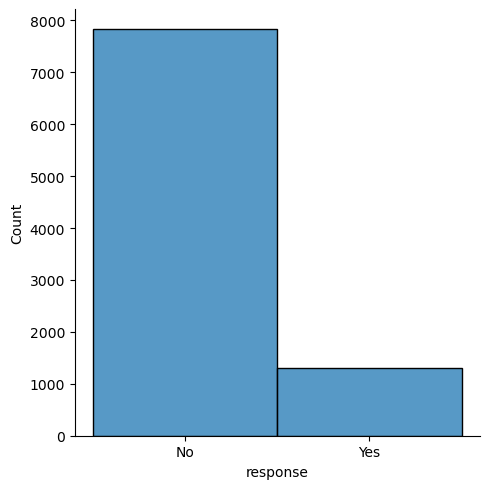

In [190]:
sns.displot(cust_da['response'])

Show a plot of the response rate by the sales channel.

<AxesSubplot:xlabel='sales_channel', ylabel='count'>

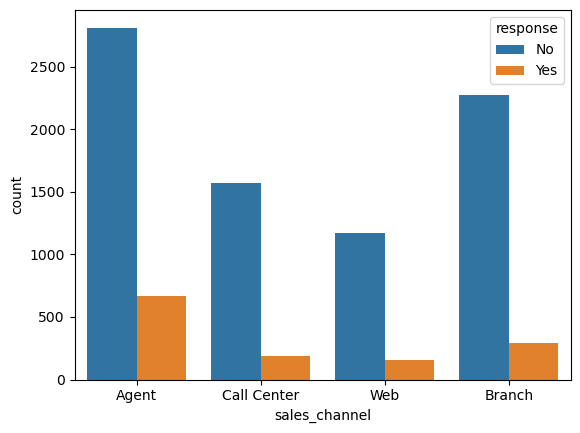

In [191]:
sns.countplot(data=cust_da, x='sales_channel', hue='response')

Show a plot of the response rate by the total claim amount.

<AxesSubplot:xlabel='response', ylabel='total_claim_amount'>

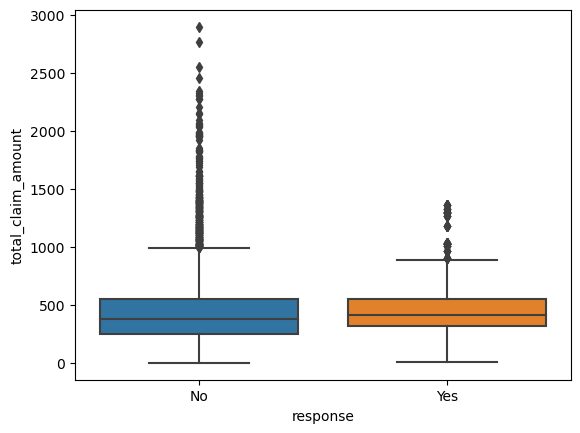

In [192]:
sns.boxplot(data=cust_da[['total_claim_amount','response']],x="response",y="total_claim_amount")

Show a plot of the response rate by income.

<AxesSubplot:xlabel='response', ylabel='income'>

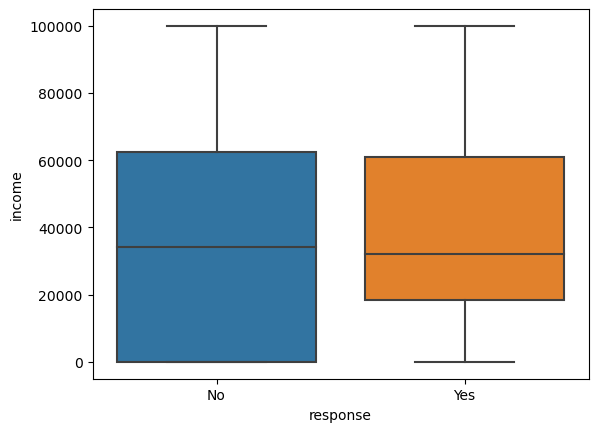

In [193]:
sns.boxplot(data=cust_da[['income','response']],x="response",y="income")

In [194]:
# Lab | Customer Analysis Round 4
# In today's lesson we talked about continuous distributions (mainly normal distribution), linear regression and how multicollinearity can impact the model. 
# In this lab, we will test your knowledge on those things using the marketing_customer_analysis.csv file. 
# You have been using the same data in the previous labs (round 2 and 3). You can continue using the same jupyter file. The file can be found in the files_for_lab folder.

# Get the data
# Use the jupyter file from the last lab (Customer Analysis Round 3)

# Complete the following task
# Check the data types of the columns. Get the numeric data into dataframe called numerical and categorical columns in a dataframe called categoricals. (You can use np.number and np.object to select the numerical data types and categorical data types respectively)
# Now we will try to check the normality of the numerical variables visually
# Use seaborn library to construct distribution plots for the numerical variables
# Use Matplotlib to construct histograms
# Do the distributions for different numerical variables look like a normal distribution
# For the numerical variables, check the multicollinearity between the features. Please note that we will use the column total_claim_amount later as the target variable.
# Drop one of the two features that show a high correlation between them (greater than 0.9). Write code for both the correlation matrix and for seaborn heatmap. If there is no pair of features that have a high correlation, then do not drop any features

Check the data types of the columns. Get the numeric data into dataframe called numerical and categorical columns in a dataframe called categoricals. (You can use np.number and np.object to select the numerical data types and categorical data types respectively)

In [195]:
categorical=cust_da.select_dtypes('object')

In [196]:
numerical=cust_da._get_numeric_data()
numerical

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,198.234764
9130,3096.511217,21604,79,14,28,0,1,379.200000
9131,8163.890428,0,85,9,37,3,2,790.784983
9132,7524.442436,21941,96,34,3,0,3,691.200000


Use seaborn library to construct distribution plots for the numerical variables

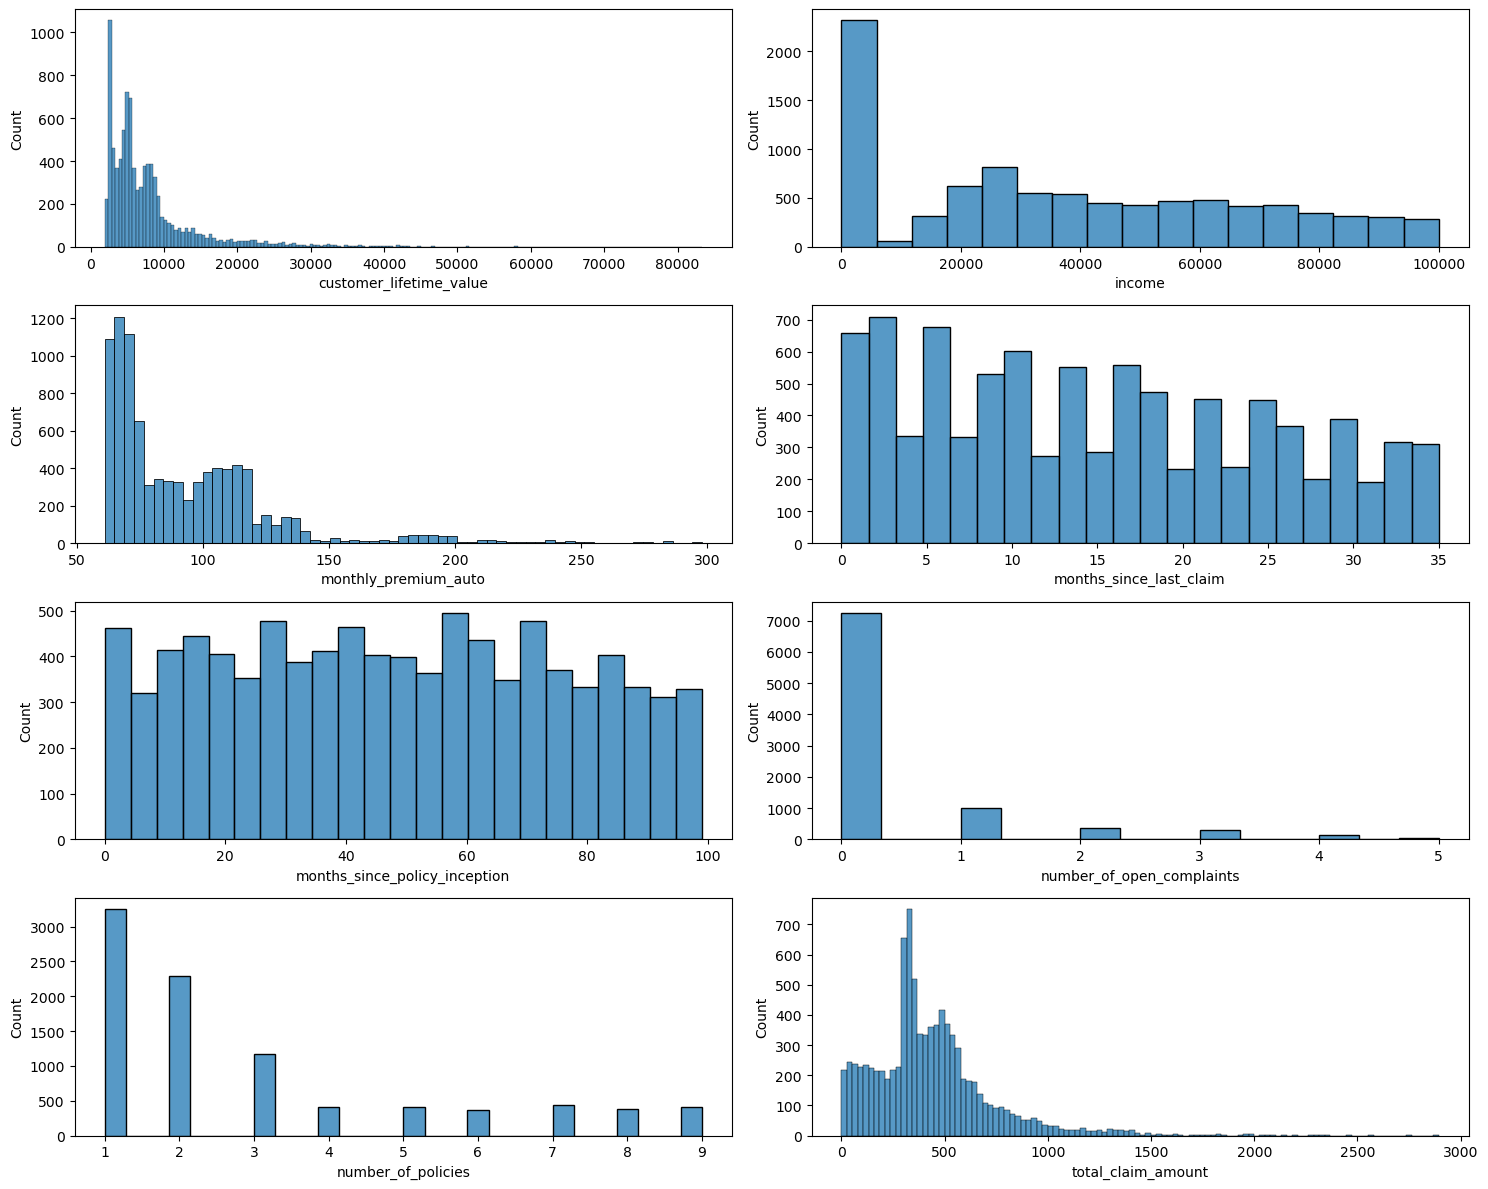

In [197]:
   
plt.figure(figsize=(15, 12))

for i, c in enumerate(list(numerical.columns)):
    axs = plt.subplot(4,2,i+1)
    sns.histplot(x=cust_da[c],ax=axs) 
plt.tight_layout()



Use Matplotlib to construct histograms

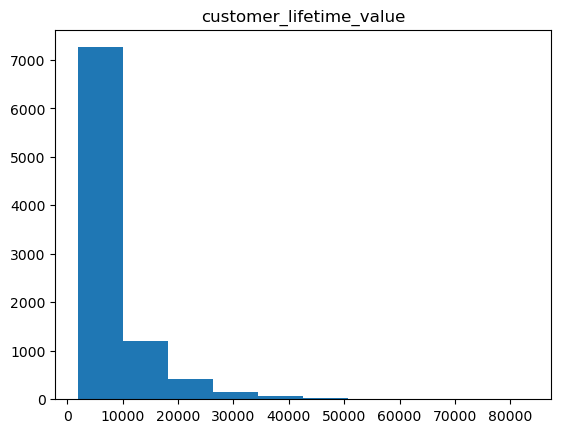

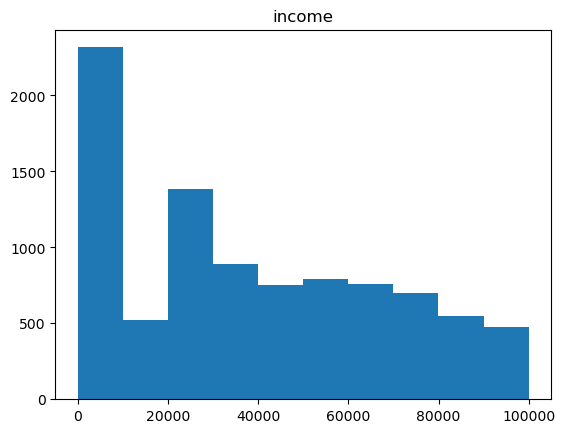

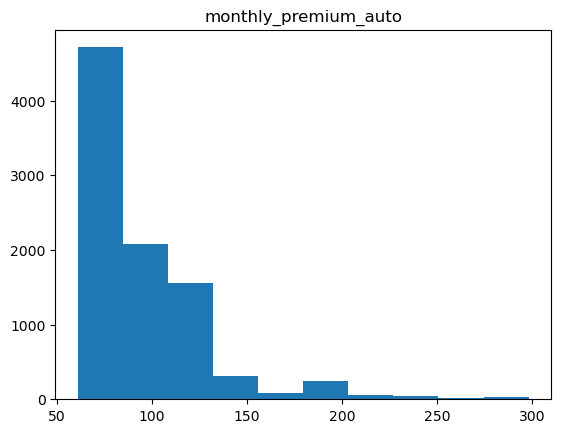

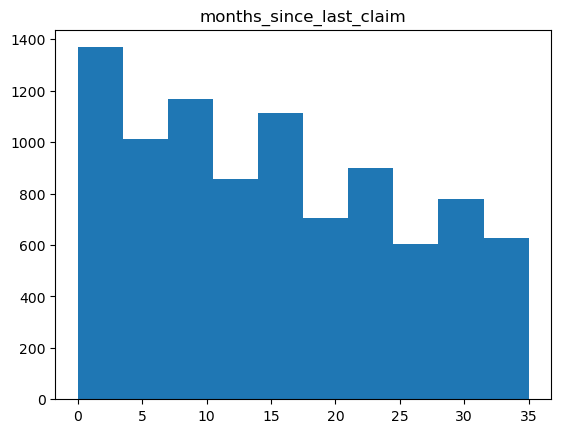

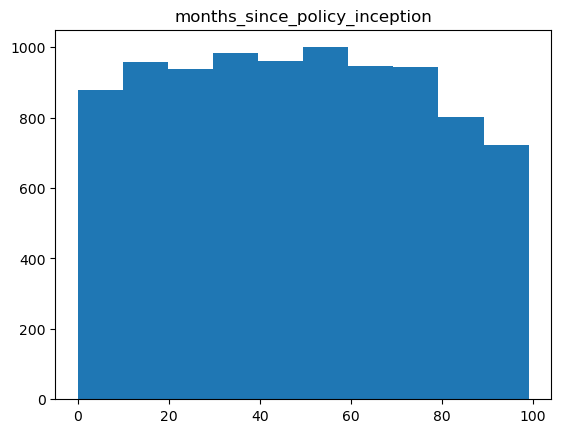

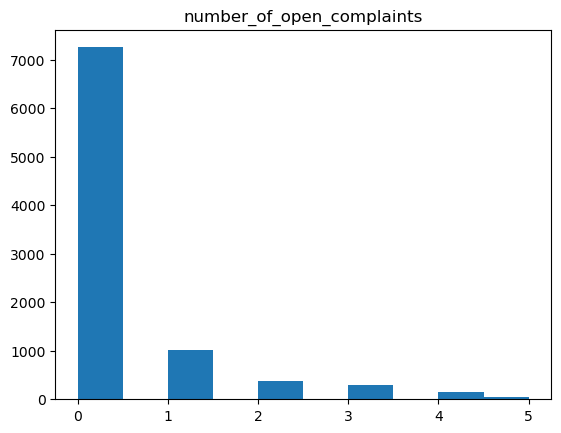

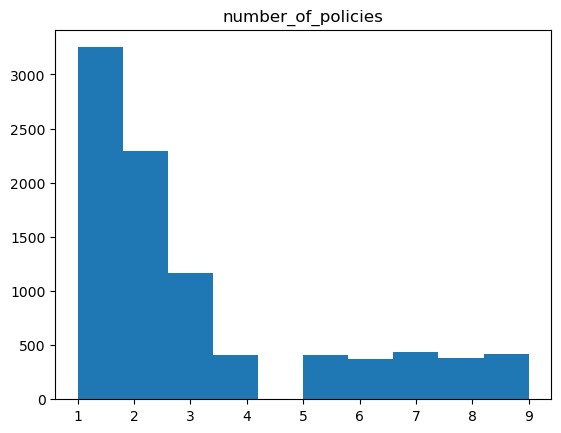

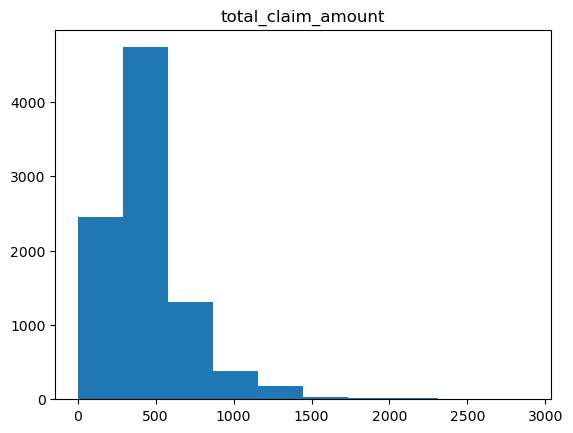

In [198]:
for col in numerical.columns:
    plt.hist(numerical[col])
    plt.title(label=col)
    plt.show()



Do the distributions for different numerical variables look like a normal distribution.


-   No, the distributions are not normal and are very skewed or slightly skewed at the least.

For the numerical variables, check the multicollinearity between the features. Please note that we will use the column total_claim_amount later as the target variable.

<AxesSubplot:>

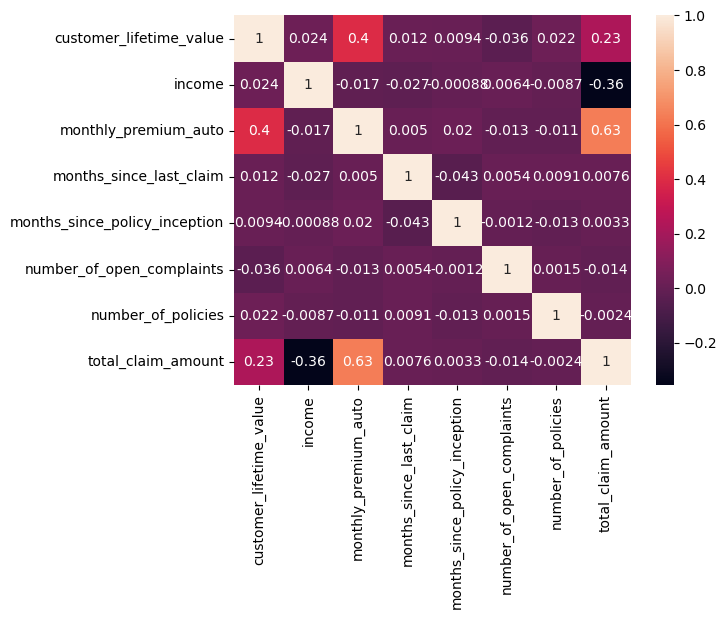

In [199]:
sns.heatmap(numerical.corr(), annot=True)

In [200]:
categorical

,customer,state,response,coverage,education,effective_to_date,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,months_col
0,BU79786,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize,2
1,QZ44356,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize,1
2,AI49188,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize,2
3,WW63253,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize,1
4,HB64268,Washington,No,Basic,Bachelor,2/3/11,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,No,Basic,Bachelor,2/10/11,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize,2
9130,PK87824,California,Yes,Extended,College,2/12/11,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize,2
9131,TD14365,California,No,Extended,Bachelor,2/6/11,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize,2
9132,UP19263,California,No,Extended,College,2/3/11,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large,2


In [201]:

from sklearn.preprocessing import MinMaxScaler

In [202]:
X_num=numerical.drop(['total_claim_amount'],axis=1)
y=numerical['total_claim_amount']

In [203]:
scaler=MinMaxScaler().fit(X_num)
X_norm=scaler.transform(X_num)
X_norm_df=pd.DataFrame(X_norm, columns=X_num.columns)


The following columns will be removed from df as they do not contribute to the model.

In [204]:
categorical.drop(['customer','effective_to_date'],axis=1,inplace=True)

In [205]:

from sklearn.preprocessing import OneHotEncoder

In [206]:
encoder=OneHotEncoder(drop='first').fit(categorical)
cat_norm=encoder.transform(categorical)
cat_norm_df=pd.DataFrame(cat_norm.toarray(),columns=encoder.get_feature_names_out())
cat_norm_df

,state_California,state_Nevada,state_Oregon,state_Washington,response_Yes,coverage_Extended,coverage_Premium,education_College,education_Doctor,education_High School or Below,...,sales_channel_Call Center,sales_channel_Web,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,vehicle_size_Medsize,vehicle_size_Small,months_col_2
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
9130,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
9131,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
9132,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [207]:
Final=pd.concat([X_norm_df,cat_norm_df],axis=1)
Final

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,state_California,state_Nevada,state_Oregon,...,sales_channel_Call Center,sales_channel_Web,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,vehicle_size_Medsize,vehicle_size_Small,months_col_2
0,0.010629,0.562847,0.033755,0.914286,0.050505,0.0,0.000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
1,0.062406,0.000000,0.139241,0.371429,0.424242,0.0,0.875,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.134960,0.487763,0.198312,0.514286,0.383838,0.0,0.125,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
3,0.070589,0.000000,0.189873,0.514286,0.656566,0.0,0.750,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,0.011245,0.438443,0.050633,0.342857,0.444444,0.0,0.000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,0.264137,0.719547,0.050633,0.514286,0.898990,0.0,0.125,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
9130,0.014719,0.216081,0.075949,0.400000,0.282828,0.0,0.000,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
9131,0.076951,0.000000,0.101266,0.257143,0.373737,0.6,0.125,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
9132,0.069098,0.219452,0.147679,0.971429,0.030303,0.0,0.250,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [208]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error,accuracy_score,f1_score,recall_score,precision_score
X_train, X_test, y_train, y_test = train_test_split(Final, y, random_state=42)

In [209]:
lm = LinearRegression().fit(X_train,y_train)

In [210]:
predictions=lm.predict(X_test)

def metric(y,x):
    
    for i in (mean_absolute_error,r2_score,mean_squared_error):
        sol=str(i)[10:str(i).find(' ',10)].replace('_',' ')
        i(y,x)
        print(sol,'is',i(y,x))
        if i==mean_squared_error:
            print('root',sol,'is',np.sqrt(i(y,x)))

    
metric(y_test,predictions)

mean absolute error is 94.3898095849889
r2 score is 0.7644693075747413
mean squared error is 19052.075390550497
root mean squared error is 138.02925556037204


In [217]:
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import QuantileTransformer

In [212]:
cust_da = pd.read_csv('files_for_lab\csv_files\marketing_customer_analysis.csv')


def dfclean(x):
    x.rename(columns=dict(zip(x.columns,[i.replace(" ","_").lower() for i in x.columns])),inplace=True)
    x.months_since_last_claim.fillna(np.median(x.months_since_last_claim.drop(list(cust_da[x.months_since_last_claim.isna()].index),axis=0)),inplace=True)
    x.number_of_open_complaints.fillna(0, inplace=True)
    x.response.fillna('no', inplace=True)
    x.drop(list(x[x.state.isna() | x.vehicle_size.isna() | x.vehicle_class.isna()].index),axis=0,inplace=True)
    x['month']=pd.to_datetime(x.effective_to_date, format='%m/%d/%y').dt.month
    i=x['total_claim_amount']
    
    y=x._get_numeric_data().drop(['total_claim_amount'],axis=1)
    z=x.select_dtypes(object).drop(['customer','effective_to_date'],axis=1)



    return x,y,z,i

cust_da, numerical, categorical, target = dfclean(cust_da)



In [213]:

def preprocess(n,c):
    encoder=OneHotEncoder(drop='first').fit(c)
    c=encoder.transform(c)
    c=pd.DataFrame(c.toarray(), columns=encoder.get_feature_names_out())
    transformer=PowerTransformer(standardize=True).fit(n)
    num=transformer.transform(n)
    scaler=StandardScaler().fit(n)
    num=pd.DataFrame(scaler.transform(n))

    return pd.concat([n,c],axis=1)

df=preprocess(numerical,categorical)



In [220]:
X_train, X_test, y_train, y_test = train_test_split(df,target,test_size=0.2,random_state=42)
lm = LinearRegression().fit(X_train,y_train)

print('Using PowerTransformer and StandardScaler')
metric(y_test,lm.predict(X_test))

Using PowerTransformer and StandardScaler
mean absolute error is 94.51732465512121
r2 score is 0.7626561666853123
mean squared error is 18871.455206846804
root mean squared error is 137.37341521141127
